In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [91]:
clientes = pd.read_csv('C://ProjetosDataScience//20190826-EstudosDeTesteBebella//2-DadosPreparados/analise_clientes_ativos.csv', sep=';')
clientes.head()

,.colCod,.dataUltCompra,.mesesCasa,.numVendas,.frequenciaFat,.numConsig,.frequenciaConsig,.mediaConsigMes,.mediaFatMes
0,10003,2019-09-18,4,2,60,3,40,896.50,594.7
1,10138,2019-10-16,37,7,159,12,93,217.12,151.1
2,10143,2019-11-05,46,87,16,90,15,824.89,819.9
3,10176,2019-10-03,2,1,60,0,0,0.00,59.9
4,10180,2019-09-18,43,14,92,2,645,9.93,57.3


In [92]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 9 columns):
.colCod              2035 non-null int64
.dataUltCompra       1994 non-null object
.mesesCasa           2035 non-null int64
.numVendas           2035 non-null int64
.frequenciaFat       2035 non-null int64
.numConsig           2035 non-null int64
.frequenciaConsig    2035 non-null int64
.mediaConsigMes      2035 non-null float64
.mediaFatMes         2035 non-null float64
dtypes: float64(2), int64(6), object(1)
memory usage: 143.2+ KB


In [93]:
clientes.describe()

,.colCod,.mesesCasa,.numVendas,.frequenciaFat,.numConsig,.frequenciaConsig,.mediaConsigMes,.mediaFatMes
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.000000,2035.000000,2035.000000,2035.000000
mean,36082.166585,19.900737,15.304177,76.147420,11.706634,69.220147,373.363528,937.971057
std,11961.151750,16.568530,27.770877,81.106076,34.457703,190.828228,832.836593,1092.478792
min,299.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.100000
25%,35576.000000,4.000000,2.000000,30.000000,0.000000,0.000000,0.000000,303.100000
50%,41591.000000,15.000000,6.000000,59.000000,0.000000,0.000000,0.000000,613.100000
75%,44345.000000,37.000000,20.000000,90.000000,7.000000,47.000000,402.000000,1181.200000
max,45103.000000,47.000000,787.000000,705.000000,454.000000,1410.000000,10923.410000,12662.400000


### Verificação dos dados

Verificando a existência de: 

- Valores nulos
- Número de vendas suspeito
- Média de faturamento suspeita

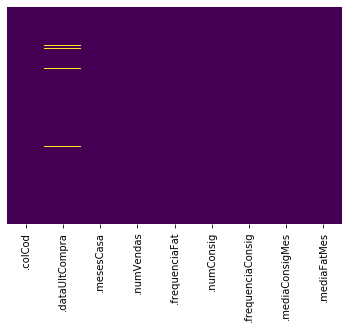

In [94]:
sns.heatmap(clientes.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Percebi que existem registros sem a anotação da data de última compra, referente a clientes que compraram apenas na matriz ou em bazares.

Como essa amostra provavelmente é pequena o suficiente para não afetar o resultado de minha pesquisa, vou retirá-la de nossos conjuntos de dados.

In [95]:
clientes.dropna(inplace = True)

In [96]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2034
Data columns (total 9 columns):
.colCod              1994 non-null int64
.dataUltCompra       1994 non-null object
.mesesCasa           1994 non-null int64
.numVendas           1994 non-null int64
.frequenciaFat       1994 non-null int64
.numConsig           1994 non-null int64
.frequenciaConsig    1994 non-null int64
.mediaConsigMes      1994 non-null float64
.mediaFatMes         1994 non-null float64
dtypes: float64(2), int64(6), object(1)
memory usage: 155.8+ KB


Removi todos os clientes com media de faturamento mensal menor ou igual a zero, pois eles não interessam para o aprendizado do algoritmo.

In [107]:
clientes.drop(clientes.loc[clientes['.mediaFatMes'] <= 0].index, inplace = True)

In [108]:
clientes.describe()

,.colCod,.mesesCasa,.numVendas,.frequenciaFat,.numConsig,.frequenciaConsig,.mediaConsigMes,.mediaFatMes
count,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000
mean,36161.929074,20.277163,15.266097,77.124245,11.942153,70.660463,381.584356,959.745875
std,11914.721582,16.502494,22.010249,79.106912,34.790496,192.752763,840.725725,1095.852528
min,299.000000,1.000000,1.000000,5.000000,0.000000,0.000000,0.000000,2.500000
25%,35808.750000,4.000000,2.000000,31.000000,0.000000,0.000000,0.000000,320.900000
50%,41710.500000,16.000000,6.000000,60.000000,0.000000,0.000000,0.000000,629.350000
75%,44361.750000,37.250000,20.000000,90.000000,7.000000,48.000000,417.110000,1207.325000
max,45103.000000,47.000000,230.000000,690.000000,454.000000,1410.000000,10923.410000,12662.400000


In [98]:
clientes.loc[clientes['.numVendas'] == 787]

,.colCod,.dataUltCompra,.mesesCasa,.numVendas,.frequenciaFat,.numConsig,.frequenciaConsig,.mediaConsigMes,.mediaFatMes
500,37288,2019-11-05,41,787,2,7,176,434.0,791.4


Em verificação no sistema, percebi que esse cliente (código 37288) é provavelmente uma ferramenta apenas para manobrar trocas, por isso resolvi retirá-lo também da amostra para que ele não influencie o algoritmo de correlação.

In [100]:
clientes.drop(clientes.loc[clientes['.colCod'] == 37288].index, inplace = True)

In [101]:
clientes.describe()

,.colCod,.mesesCasa,.numVendas,.frequenciaFat,.numConsig,.frequenciaConsig,.mediaConsigMes,.mediaFatMes
count,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000
mean,36114.137481,20.278976,15.231811,77.751129,11.949824,70.590567,381.013939,957.340542
std,11957.181287,16.510142,21.993255,81.192451,34.777527,192.553852,839.828348,1095.527273
min,299.000000,1.000000,1.000000,5.000000,0.000000,0.000000,0.000000,-0.100000
25%,35771.000000,4.000000,2.000000,31.000000,0.000000,0.000000,0.000000,320.000000
50%,41700.000000,16.000000,6.000000,60.000000,0.000000,0.000000,0.000000,627.300000
75%,44360.000000,38.000000,20.000000,90.000000,7.000000,48.000000,417.110000,1204.900000
max,45103.000000,47.000000,230.000000,705.000000,454.000000,1410.000000,10923.410000,12662.400000


Em verificação também no sistema, indentifiquei que esse cliente (código 35272) com 230 compras, trata-se de um cliente normal que compra constantemente há algum tempo. 

Portanto eu mantive na amostra.

In [102]:
clientes.loc[clientes['.numVendas'] == 230]

,.colCod,.dataUltCompra,.mesesCasa,.numVendas,.frequenciaFat,.numConsig,.frequenciaConsig,.mediaConsigMes,.mediaFatMes
376,35272,2019-10-31,46,230,6,5,276,52.8,4644.7


Continuando a verificação no sistema, percebi que o cliente 17064 trata-se de envio de peças para desfile e/ou revista.

Por isso removi da amostra para não influenciar no aprendizado do algoritmo.

In [105]:
clientes.loc[clientes['.frequenciaFat'] == 705]

,.colCod,.dataUltCompra,.mesesCasa,.numVendas,.frequenciaFat,.numConsig,.frequenciaConsig,.mediaConsigMes,.mediaFatMes
139,17064,2019-11-01,47,2,705,73,19,602.08,5.0


In [116]:
clientes.drop(clientes.loc[clientes['.colCod'] == 17064].index, inplace = True)

In [118]:
clientes.describe()

,.colCod,.mesesCasa,.numVendas,.frequenciaFat,.numConsig,.frequenciaConsig,.mediaConsigMes,.mediaFatMes
count,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000
mean,36161.929074,20.277163,15.266097,77.124245,11.942153,70.660463,381.584356,959.745875
std,11914.721582,16.502494,22.010249,79.106912,34.790496,192.752763,840.725725,1095.852528
min,299.000000,1.000000,1.000000,5.000000,0.000000,0.000000,0.000000,2.500000
25%,35808.750000,4.000000,2.000000,31.000000,0.000000,0.000000,0.000000,320.900000
50%,41710.500000,16.000000,6.000000,60.000000,0.000000,0.000000,0.000000,629.350000
75%,44361.750000,37.250000,20.000000,90.000000,7.000000,48.000000,417.110000,1207.325000
max,45103.000000,47.000000,230.000000,690.000000,454.000000,1410.000000,10923.410000,12662.400000


O cliente de código 6458, que apresenta números distorcidos (tempo de casa e frequencia de vendas) trata-se de um cliente residente de Chapecó SC, que foi atendido pelo Mega Polo em 2015 e recuperado por Brusque agora em 2019.

Portanto permanecerá na amostra.

In [119]:
clientes.loc[clientes['.frequenciaFat'] == 690]

,.colCod,.dataUltCompra,.mesesCasa,.numVendas,.frequenciaFat,.numConsig,.frequenciaConsig,.mediaConsigMes,.mediaFatMes
1973,6458,2019-10-02,46,2,690,0,0,0.0,23.1


### Começando as análises

Vamos analisar algumas condições para compreender nossos dados.

Condição 1: quanto mais tempo de casa, maior o consumo mensal?

In [112]:
clientes.columns

Index(['.colCod', '.dataUltCompra', '.mesesCasa', '.numVendas',
       '.frequenciaFat', '.numConsig', '.frequenciaConsig', '.mediaConsigMes',
       '.mediaFatMes'],
      dtype='object')

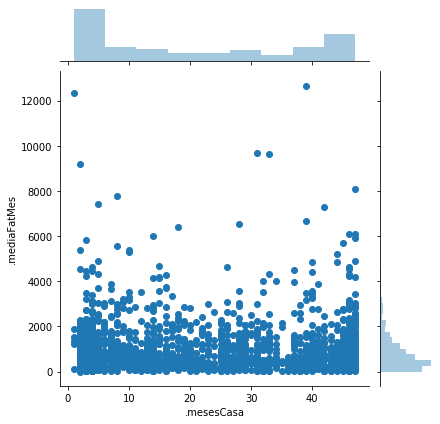

In [110]:
sns.jointplot(x='.mesesCasa',y='.mediaFatMes',data=clientes)

Condição 2: existe relação entre a frequência de compras media de consumo mensal?

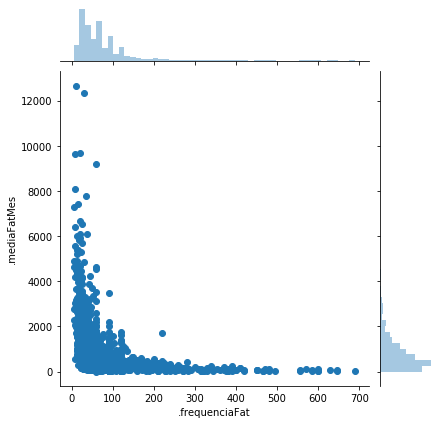

In [113]:
sns.jointplot(x='.frequenciaFat',y='.mediaFatMes',data=clientes)

Verificando correlação em todos os pares

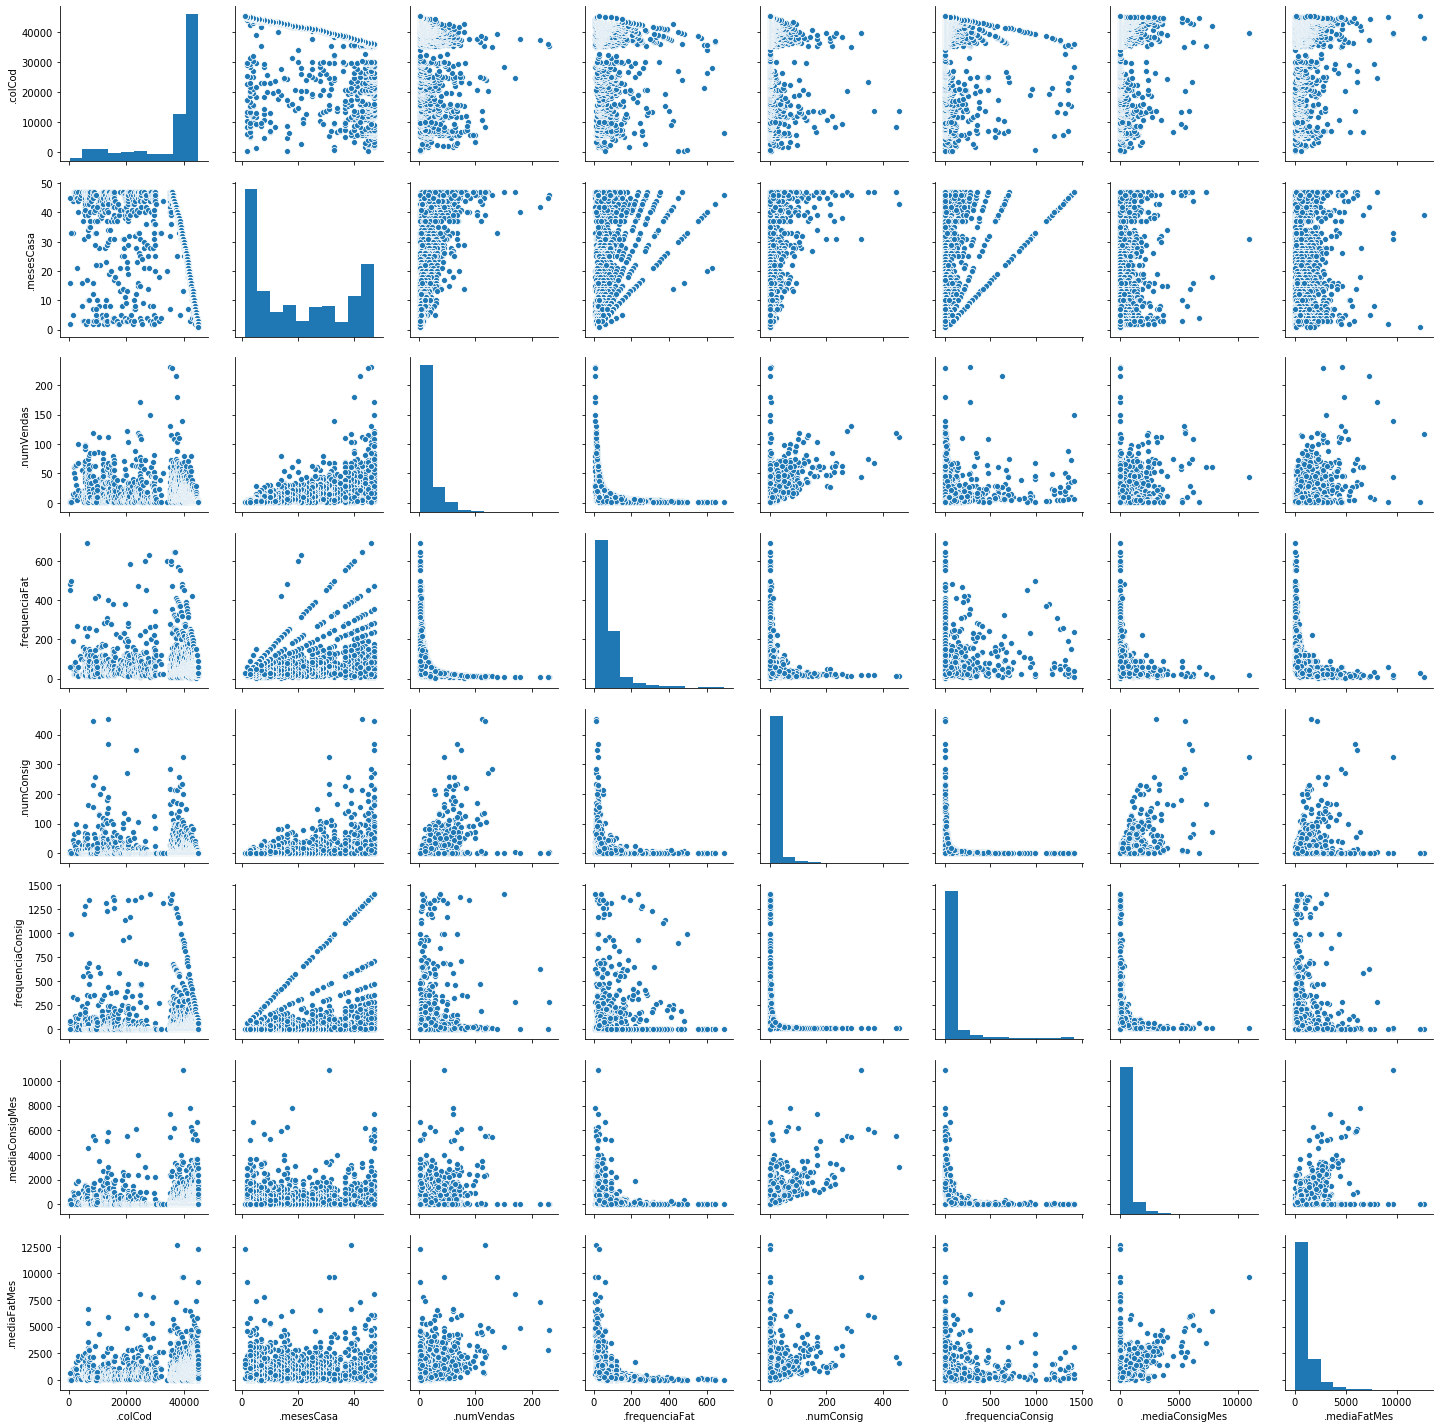

In [130]:
sns.pairplot(clientes)

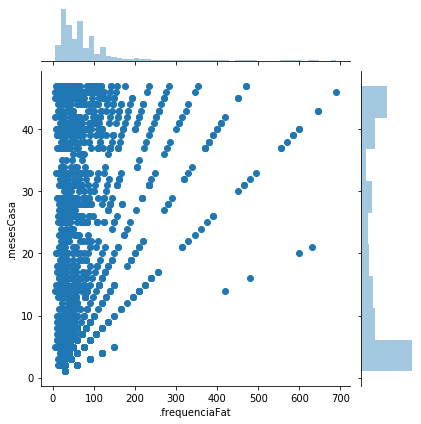

In [133]:
sns.jointplot(x='.frequenciaFat', y='.mesesCasa', data=clientes)

Baseado nos pares de correlação, a característica que mais se relaciona com a média de consumo mensal é a média mensal de volume remetido em consignação.

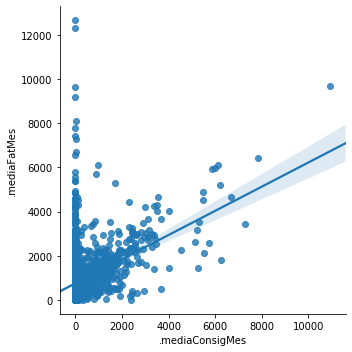

In [120]:
sns.lmplot(x='.mediaConsigMes', y='.mediaFatMes', data=clientes)

Ainda assim, é uma correlação muito vaga, não serve como base para aprendizado e previsões.

### Checando os índices de correlação:

In [125]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [121]:
X = clientes[['.mesesCasa', '.numVendas', '.frequenciaFat', '.numConsig', '.frequenciaConsig', '.mediaConsigMes']]
y = clientes['.mediaFatMes']

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [127]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [129]:
coeficientes = pd.DataFrame(lm.coef_,X.columns)
coeficientes.columns = ['Coeficiente']
coeficientes

,Coeficiente
.mesesCasa,-12.676282
.numVendas,21.626859
.frequenciaFat,-2.076978
.numConsig,-4.178516
.frequenciaConsig,0.042700
.mediaConsigMes,0.499941


### Conclusões:

- Quanto mais antigo é o cliente, menor é a sua média de consumo mensal.
+ Quanto maior é o número de visitas do cliente na loja, maior é sua média de consumo mensal.
- Quanto maior é a distância média em dias entre cada visita na loja, menor é a média de consumo mensal do cliente.
- Quanto maior é o número de remessas em consignação que o cliente recebe, menor é a sua média de consumo mensal.
+ Quanto maior é a distância média em dias entre cada remessa de consignação para o cliente, maior é a sua média de consumo mensal, porém é irrelevante o acréscimo na média de consumo.
+ Quanto maior é a média mensal de valor remetido em consignação para um cliente, maior é a sua média de consumo mensal, porém, é irrelevante o acréscimo na média de consumo.

Com base nessas informações, concluo que os investimentos mais eficientes serão aqueles contemplados no esforço de fidelização do cliente, buscando aumentar sua quantidade de visitas na loja e o seu interesse pela marca ao longo do tempo.